In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop(columns="Serial No.", inplace=True)

In [5]:
data.shape

(500, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
data.duplicated().sum()

0

In [8]:
data["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [9]:
data["SOP"].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [10]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [11]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [12]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

2022-04-15 12:29:46.997756: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [15]:
history = model.fit(x_train_scaled,y_train, epochs=100, validation_split=0.2)

2022-04-15 12:29:47.332154: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.8627 - val_loss: 0.7988
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7078 - val_loss: 0.6701
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5842
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5386 - val_loss: 0.5222
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4820 - val_loss: 0.4701
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4299 - val_loss: 0.4183
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3765 - val_loss: 0.3677
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3245 - val_loss: 0.3134
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2720 - val_loss: 0.2603
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2227 - val_loss: 0.2119
Epoch 11

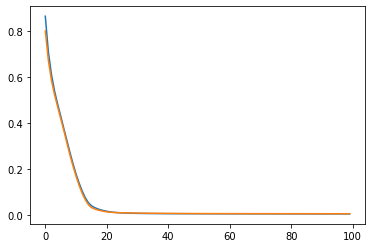

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [17]:
predicted = model.predict(x_test_scaled)

In [18]:
r2_score(y_test,predicted)*100

76.32631589870844